In [83]:
import pandas as pd
import numpy as np
import warnings
import requests
import io # for web-download
import re # for data processing
warnings.filterwarnings('ignore')

## Задача 1
На основании данных портала "Открытые данные России" о результатах Химического анализа родника в Нескучном саду https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad средствами библиотеки Pandas сформируйте поле выводов по каждому анализирумомому параметру. Например, по показателю pH получен результат 8.4 единицы pH при нормативе от 6 до 9 единиц pH. Т.о. по данному показателю результат анализа в норме. Для решения задачи необходимо программно "прочитать и понять" значение столбца "Норматив" и выделенное численное значение сравнить с нормативом согласно логике норматива. Например, 6 >= pH >= 9. В итоговом DataFrame столбец "Показатель" сделайте индексным.

Загзрузка DataFrame выполняется непосредственно c сайта "Открытые данные России" https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad/data-20160608T1215-structure-20160608T1215.csv (см. код ниже).

'2'

'9'

In [197]:
# headers={
#     'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
# }
# def get_content(url):
#     with requests.Session() as req:
#         req.headers.update(headers)
#         r = req.get(url).content
#     return r

# url ="https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad/data-20160608T1215-structure-20160608T1215.csv"
# s = get_content(url)

# df=pd.read_csv(io.StringIO(s.decode('UTF8')))

## DOESNT WORK 


### Если не работает загрузка on-line
df=pd.read_csv("Химический анализ родника в Нескучном саду.csv", sep=';')
df['Норматив']

def test_result(row):
    """парсит значение норматива и отдает true, если значение проходит"""
    result = re.sub('[^,\.0-9]', '', row['Результат анализа']) 
    result = 0.0 if result == '' else float(result)
    if re.match('в пределах \d{1,}(,\d{1,}|)-\d{1,}(,\d{1,}|)', row['Норматив']):
        n_min = float(re.sub('в пределах (\d{1,}(,\d{1,}|))-(\d{1,}(,\d{1,}|))', r'\1', row['Норматив']))
        n_max = float(re.sub('в пределах (\d{1,}(,\d{1,}|))-(\d{1,}(,\d{1,}|))', r'\3', row['Норматив']))
        return n_min <= float(row['Результат анализа']) and  float(row['Результат анализа'])<= n_max
    if re.match('не более \d{1,}(,\d{1,}|)(-\d{1,},\d{1,}|)', row['Норматив']): 
        n_min = float(re.sub("не более (\d{1,}(,\d{1,}|))(-(\d{1,}(|,\d{1,}))|)", r'\1', row['Норматив']).replace(',', '.'))
        n_max = re.sub("не более (\d{1,}(,\d{1,}|))(-(\d{1,}(|,\d{1,}))|)", r'\4', row['Норматив'])
        # второго числа может не быть
        n_max = 0.0 if n_max == '' else float(n_max) 
        return result <= max(n_min, n_max)
    
df=df.set_index('Показатель')
df['check'] = df.apply(lambda x: test_result(x), axis=1)
df.style.bar(subset=['check'], color = 'green')

,Единица измерений,Результат анализа,Норматив,check
Показатель,,,,
pH,единицы pH,8.4,в пределах 6-9,True
Запах,баллы,1,не более 2-3,True
Цветность,градусы,б/цвета,не более 30,True
Жёсткость,мг-эквл/дм3,9.199999999999999,в пределах 7-10,True
Аммиак и аммоний-ион (по азоту),мг/дм3,0.42,"не более 1,5",True
Нитриты (по NO2),мг/дм3,0.017,"не более 3,3",True
Нитраты (по NO3),мг/дм3,24,не более 45,True
Фосфаты (P),мг/дм3,0.36,"не более 3,5",True
Хлориды (Cl),мг/дм3,200,не более 350,True


## Задача 2
В ящике 5 апельсинов и 4 яблока. Наудачу выбираются 3 фрукта. Какова вероятность, что все три фрукта – апельсины?

В интернете полученный аналитически ответ 0.119. Подтверждается ли он эксперементально?

In [6]:
box = 5 * ['апельсин'] + 4 * ['яблок']

In [1]:
from tqdm import tqdm

In [8]:
result = []
for _ in tqdm(range(0, 200)):
    df = pd.DataFrame(map(lambda x: list(np.random.choice(box, size = 3, replace=False)), range(0,10000)))
    result.append(df[(df[0] == 'апельсин' ) & (df[1] == df[0]) & (df[2]==df[0])].shape[0] / df.shape[0])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:44<00:00,  4.47it/s]


In [189]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

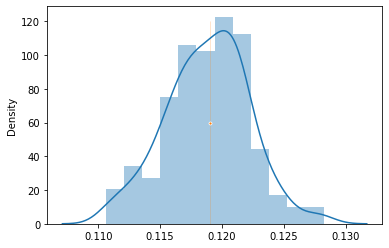

In [12]:
sns.distplot(result)
sns.lineplot([.119, .119], [0, 120], marker = '.')

как видим, нормально так подтверждается с некоторым разбросом :) 

## Задача 3
Мастер, имея 10 деталей, из которых 3 – нестандартных, проверяет детали одну за другой, пока ему не попадется стандартная. Какова вероятность, что он проверит ровно две детали?

В интернете полученный аналитически ответ 7/30 или 0.23333. Подтверждается ли он эксперементально?

In [76]:
import numpy as np, pandas as pd 
import seaborn as sns 
from tqdm import tqdm

In [77]:
def takeAttempt():
    attempt = list(np.random.choice((['sd'] * 7 + ['unsd'] * 3), size = 2, replace=False))
    if 'sd' in attempt and 'unsd' in attempt: 
        return 1
    return 0

result = []
for _ in tqdm(range(0,200)):
    result_part = []
    for i in range(0,10000):
        result_part.append(takeAttempt())

    result.append(np.sum(result_part) / len(result_part))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:46<00:00,  4.34it/s]


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

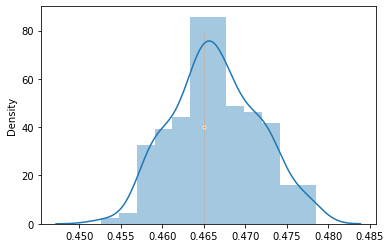

In [79]:
sns.distplot(result)
sns.lineplot([.465, .465], [0, 80], marker = '.')
plt.show()

мы видим, что аналитический ответ не совпадает с эмпирическим. 